# <font color='red'>GUN VIOLENCE DATA ANALYSIS</font>

## Group members:

### <font color='green'>Pradyumn Bangera</font>
### <font color='green'>Harsh Verma</font>

# Curated dataset

### https://www.kaggle.com/jameslko/gun-violence-data

# Introduction

### According to CDC, "One person is killed by a firearms every 17 minutes, 87 people are killed during an average day, and 609 are killed every week”(CDC). Gun violence has become one of the biggest problems in the history of the country. The alarming mortality rate as well as how frequenctly the crime occurs has made it a focus during every election but we have still failed to solve or even address this problem propery. We know that these deaths are a predictable outcome of our lack of analytical skill and an underinvestment in prevention approaches that work. Through data analysis that focuses on drawing from evidence and addressing the factors that increase or decrease the risk of gun violence, particularly in communities that are disproportionately impacted, we can save lives.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import folium
import requests
import random
from folium.map import *
from folium import plugins
from folium.plugins import MeasureControl
from folium.plugins import FloatImage

# Cleaning data: Removing NaN value from latitude and longitude

In [2]:
# print(pd.__version__)
data = pd.read_csv("gun-violence-data_01-2013_03-2018.csv")
# print(len(data))
data = data[pd.notnull(data.latitude)]
data = data[pd.notnull(data.longitude)]
# print(len(data))
data.head()

,incident_id,date,state,city_or_county,address,n_killed,n_injured,incident_url,source_url,incident_url_fields_missing,...,participant_age,participant_age_group,participant_gender,participant_name,participant_relationship,participant_status,participant_type,sources,state_house_district,state_senate_district
0,461105,2013-01-01,Pennsylvania,Mckeesport,1506 Versailles Avenue and Coursin Street,0,4,http://www.gunviolencearchive.org/incident/461105,http://www.post-gazette.com/local/south/2013/0...,False,...,0::20,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||3::Male||4::Female,0::Julian Sims,NaN,0::Arrested||1::Injured||2::Injured||3::Injure...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://pittsburgh.cbslocal.com/2013/01/01/4-pe...,NaN,NaN
1,460726,2013-01-01,California,Hawthorne,13500 block of Cerise Avenue,1,3,http://www.gunviolencearchive.org/incident/460726,http://www.dailybulletin.com/article/zz/201301...,False,...,0::20,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male,0::Bernard Gillis,NaN,0::Killed||1::Injured||2::Injured||3::Injured,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://losangeles.cbslocal.com/2013/01/01/man-...,62.0,35.0
2,478855,2013-01-01,Ohio,Lorain,1776 East 28th Street,1,3,http://www.gunviolencearchive.org/incident/478855,http://chronicle.northcoastnow.com/2013/02/14/...,False,...,0::25||1::31||2::33||3::34||4::33,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||2::Male||3::Male||4::Male,0::Damien Bell||1::Desmen Noble||2::Herman Sea...,NaN,"0::Injured, Unharmed, Arrested||1::Unharmed, A...",0::Subject-Suspect||1::Subject-Suspect||2::Vic...,http://www.morningjournal.com/general-news/201...,56.0,13.0
3,478925,2013-01-05,Colorado,Aurora,16000 block of East Ithaca Place,4,0,http://www.gunviolencearchive.org/incident/478925,http://www.dailydemocrat.com/20130106/aurora-s...,False,...,0::29||1::33||2::56||3::33,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Female||1::Male||2::Male||3::Male,0::Stacie Philbrook||1::Christopher Ratliffe||...,NaN,0::Killed||1::Killed||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...,http://denver.cbslocal.com/2013/01/06/officer-...,40.0,28.0
4,478959,2013-01-07,North Carolina,Greensboro,307 Mourning Dove Terrace,2,2,http://www.gunviolencearchive.org/incident/478959,http://www.journalnow.com/news/local/article_d...,False,...,0::18||1::46||2::14||3::47,0::Adult 18+||1::Adult 18+||2::Teen 12-17||3::...,0::Female||1::Male||2::Male||3::Female,0::Danielle Imani Jameison||1::Maurice Eugene ...,3::Family,0::Injured||1::Injured||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...,http://myfox8.com/2013/01/08/update-mother-sho...,62.0,27.0


# Plotting the crime data on the map

### Here we have just used the latitude and logitude values from every gun violence case and plotted them on the folium graph using circle markers for a good idea about how these gun violence crimes are distributed throughout the entire country.

In [3]:
from folium.plugins import FastMarkerCluster
map_osm = folium.Map(location=[48, -102], zoom_start=4)
counter = 0
ct= 0 
sam = data.sample(3000)
FastMarkerCluster(data = list(zip(sam['latitude'].values, sam['longitude'].values))).add_to(map_osm)
for index,loc in sam.iterrows():

        if(pd.notnull(loc[14]) and pd.notnull(loc[16])):
            latlong = [loc[14], loc[16]]
        folium.CircleMarker(location=latlong, radius=8, fill_opacity=.5, fill=True).add_to(map_osm)
folium.LayerControl().add_to(map_osm)
    
map_osm

# Cleaning data: Splitting dates for better acessibillity and Plotting total gun violence cases in every year

### In the following piece of code, we have just worked on tidying and scraping the data required which in this case is splitting month into 3 different columns of month year and day so that we can access it more easily. We have further used it to acquire the frequency of gun violence crimes over the different years so that we can get an idea about whether we have had a yearlly incline or decline.

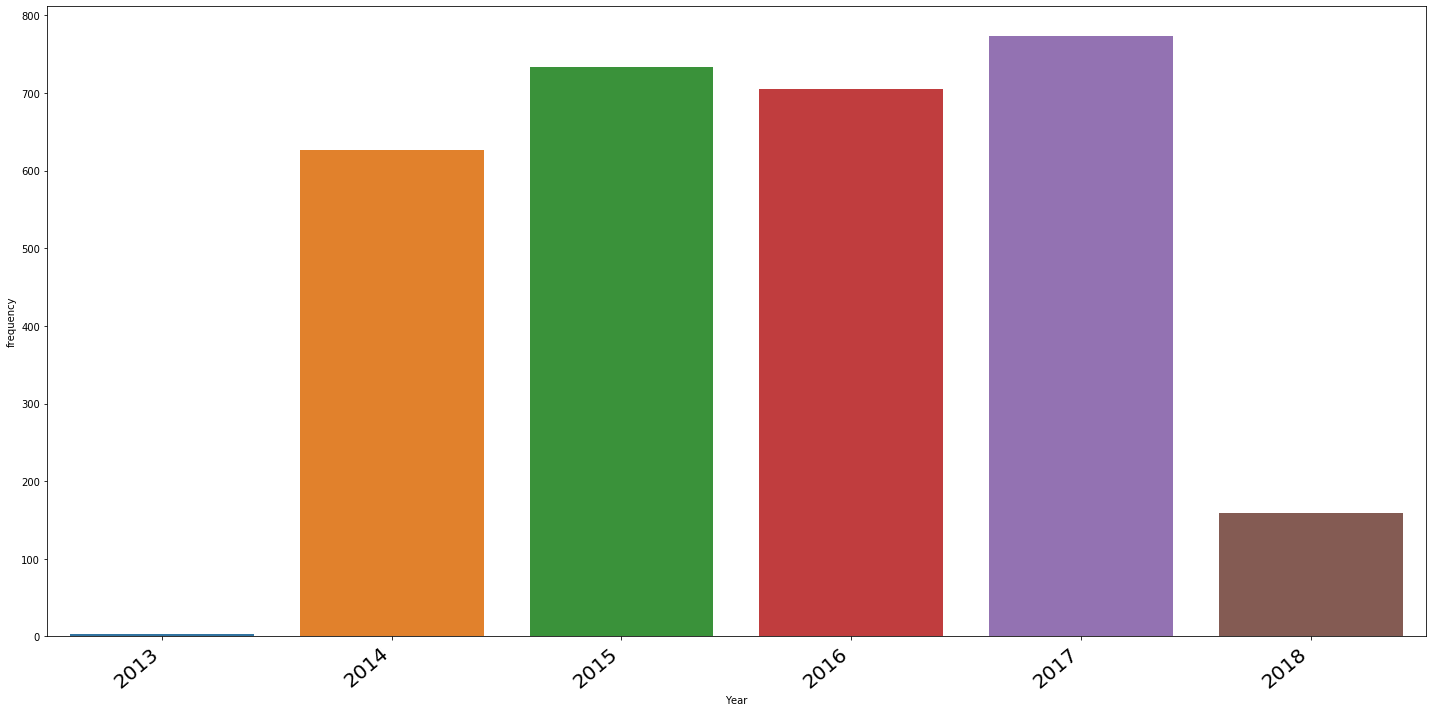

In [4]:
import collections
import seaborn as sns
year = []
month = []
day = []
q = []
count = 0
uniqueyear = {}
for index,loc in sam.iterrows():
    year.append(int(loc[1].split('-')[0]))
    month.append(int(loc[1].split('-')[1]))
    day.append(int(loc[1].split('-')[2]))
sam['Year'] = year
sam['Month'] = month
sam['Day'] = day

for i in year:
    if i not in q:
        q.append(i)
        uniqueyear[i] = 0
        
for i in year:
    uniqueyear[i] += 1
    
uniqueyear = collections.OrderedDict(sorted(uniqueyear.items()))

f = []
y = []
for i in uniqueyear:
    f.append(uniqueyear[i])
    y.append(i)
p = pd.DataFrame({'Year' : y , 'frequency' : f})
        
plt.figure(figsize = (20, 10))
ax = sns.barplot(x = p['Year'], y = p['frequency'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right",fontsize=20)
plt.tight_layout()
plt.show()

# Plotting the total gun cases against every year

### In the following plot graph, we have made an effort to plot the respective number of gun violence cases against their respective years, I have done this by initially creating a dictionary that maps each year to the total number of gun violence cases that have happened in that respective year. Eventually i have mapped every key and and its values to different lists. Furthermore, I have then created a pandas dataframe that just has two columns-Year and frequency. Using the dataframe, I have plotted the columns on the X and Y axis using Matplotlib to give us a good idea of how variable gun violence has been over the years between 2013 and 2018.

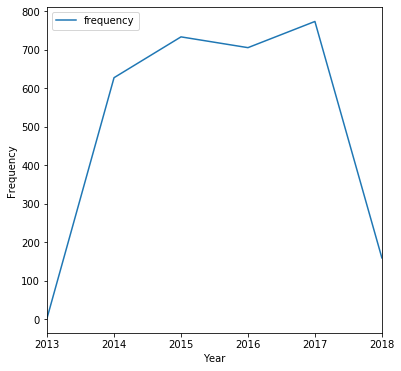

In [5]:
fig, ax = plt.subplots(figsize=(6,6))

p.plot(x = 'Year', y = 'frequency', ax = ax)
plt.ylabel('Frequency')
ax.set_xlim([2013,2018])
plt.show()

# Gun violence data for each state

### In the following dataset, we have tried to depict the total number of gun violence cases that have taken place in every state in the United States of America. We have done so by counting the total occurences of rows in the data frame with the respective states. Furthermore we have created a dictionary to keep track of this data and later used the dictionary to create a data frame with columns - states and Frequency. We have later plotted the data using a bar plot.

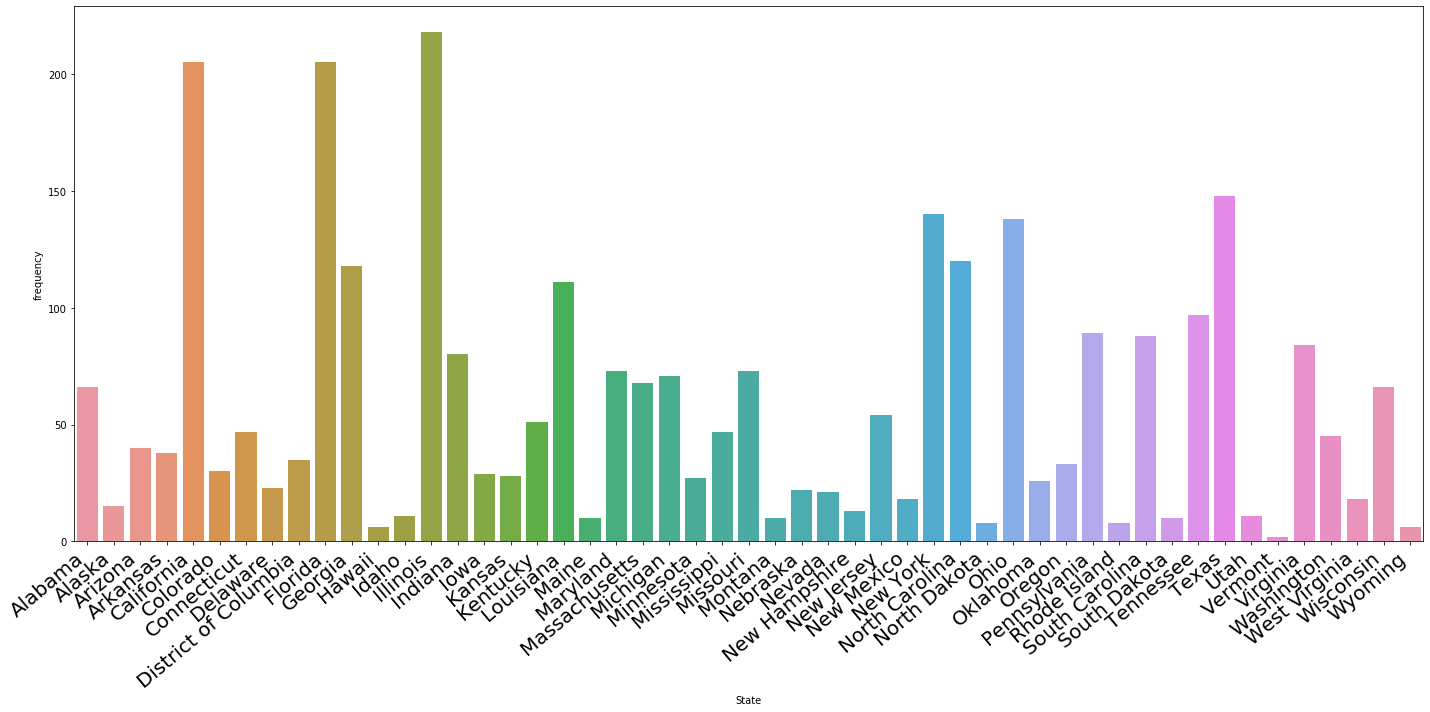

In [6]:
state = []
unst = {}
for i in sam['state']:
    if i not in state:
        state.append(i)
        unst[i] = 0

for i in sam['state']:
    unst[i] += 1
    
unst = collections.OrderedDict(sorted(unst.items()))

s = []
f = []
for i in unst:
    f.append(unst[i])
    s.append(i)
p = pd.DataFrame({'State' : s , 'frequency' : f})

    


plt.figure(figsize = (20, 10))
ax = sns.barplot(x = p['State'], y = p['frequency'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right",fontsize=20)
plt.tight_layout()
plt.show()

# Graph to notice trend of incline/decline in each state

### In the following graph, we have attempted to display the total cases of gun vioilence that have taken place inevery state of the United states of America between the period from 2013 - 2018. In order to do so we created a new panda dataframe that condidted of columns - Year, States, and Frequency/count of gun violence crimes. This dataframe allowed us to present total gun violence crimes in each state in each year in a very concise manner. Later we grouped the data frame by the name of the state and plotted it on the graph.

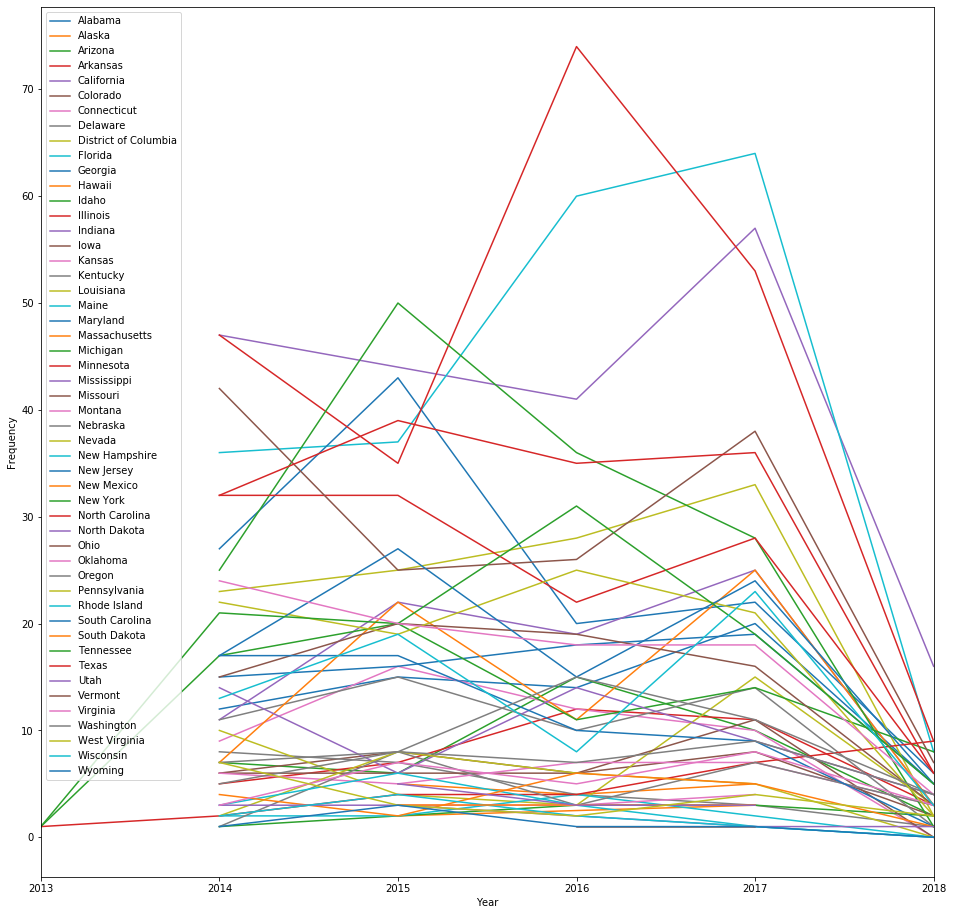

In [7]:
fig, ax = plt.subplots(figsize=(16,16))
sam = sam.groupby('Year')
count2013 = {}
count2014 = {}
count2015 = {}
count2016 = {}
count2017 = {}
count2018 = {}
for i, tabs in sam:
    for s in state:
#         print(s)
        for r in tabs.iterrows():
            if s == r[1][2]:
                count2013[s] = 0
                count2014[s] = 0
                count2015[s] = 0
                count2016[s] = 0
                count2017[s] = 0
                count2018[s] = 0
                
for i, tabs in sam:
    if i ==2013:
        for s in state:
            for r in tabs.iterrows():
                if s == r[1][2]:
                    count2013[s] += 1
                
    if i ==2014:
        for s in state:
            for r in tabs.iterrows():
                if s == r[1][2]:
                    count2014[s] += 1
    if i ==2015:
        for s in state:
            for r in tabs.iterrows():
                if s == r[1][2]:
                    count2015[s] += 1
    if i ==2016:
        for s in state:
            for r in tabs.iterrows():
                if s == r[1][2]:
                    count2016[s] += 1
    if i ==2017:
        for s in state:
            for r in tabs.iterrows():
                if s == r[1][2]:
                    count2017[s] += 1
                    
    if i ==2018:
        for s in state:
            for r in tabs.iterrows():
                if s == r[1][2]:
                    count2018[s] += 1
                    

y = []
stt = []
freq = []



for i in count2013:
    if count2013[i]>0:
        y.append(2013)
        stt.append(i)
        freq.append(count2013[i])
        
for i in count2014:
    if count2014[i]>0:
        y.append(2014)
        stt.append(i)
        freq.append(count2014[i])
    
for i in count2015:
    if count2015[i]>0:
        y.append(2015)
        stt.append(i)
        freq.append(count2015[i])
        
for i in count2016:
    if count2016[i]>0:
        y.append(2016)
        stt.append(i)
        freq.append(count2016[i])
        
        
for i in count2017:
    if count2017[i]>0:
        y.append(2017)
        stt.append(i)
        freq.append(count2017[i])
        
        
for i in count2018:
    if count2014[i]>0:
        y.append(2018)
        stt.append(i)
        freq.append(count2018[i])
        
    
df = pd.DataFrame({'Year':y, 'State':stt,'Frequency':freq})
    

probtwo = df.groupby('State')
for stateName, tabs in probtwo:
    tabs.plot(x = 'Year', y = 'Frequency', ax = ax, label = stateName)
plt.ylabel('Frequency')
plt.xlabel('Year')
ax.set_xlim([2013,2018])
plt.show()

# Bar graph showing the number of people killed and injured over the years

### In the following graph we have shown the number of people killed in crime vs the number of people injured over the years (2013 - 2018). We can conclude that the number of people injured is way more than the number of people killed.

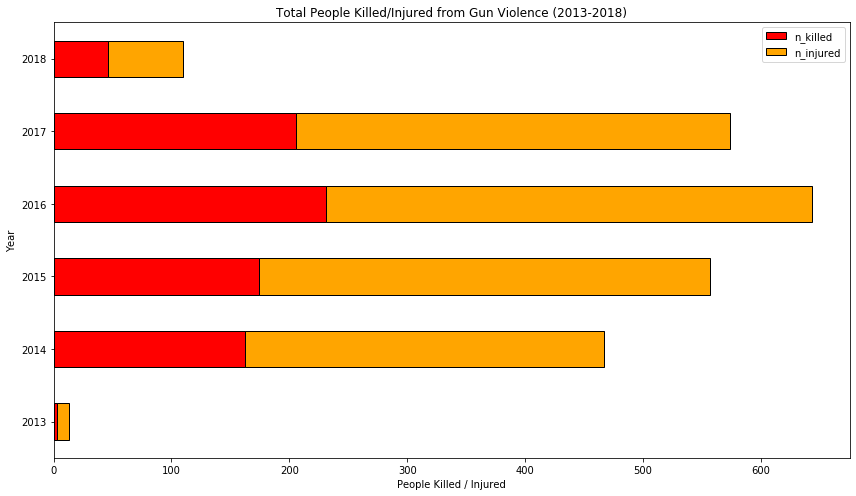

In [8]:
total_chart = sam[["n_killed","n_injured"]].sum().plot(kind="barh", stacked=True, figsize=(12,7), linewidth = 1, color=['red', 'orange'], edgecolor = "black")
plt.xlabel("People Killed / Injured")
plt.ylabel("Year")
plt.legend(prop = {"size":10})
plt.title("Total People Killed/Injured from Gun Violence (2013-2018)",fontsize = 12)
plt.tight_layout()
plt.show()